In [79]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from itertools import permutations
from scipy.spatial.distance import cdist

import pickle
from datetime import datetime

import json

In [80]:
# Import the dataset to be used for the project
df = pd.read_csv('../../data/raw_data/all_genres_playlists.csv')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           9198 non-null   object 
 1   playlist_url       9198 non-null   object 
 2   playlist_name      9198 non-null   object 
 3   track_name         9198 non-null   object 
 4   track_popularity   9198 non-null   int64  
 5   artist_name        9198 non-null   object 
 6   album              9198 non-null   object 
 7   album_cover        9198 non-null   object 
 8   artist_genres      9198 non-null   object 
 9   artist_popularity  9198 non-null   int64  
 10  danceability       9198 non-null   float64
 11  energy             9198 non-null   float64
 12  key                9198 non-null   int64  
 13  loudness           9198 non-null   float64
 14  mode               9198 non-null   int64  
 15  speechiness        9198 non-null   float64
 16  acousticness       9198 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           9198 non-null   object 
 1   playlist_url       9198 non-null   object 
 2   playlist_name      9198 non-null   object 
 3   track_name         9198 non-null   object 
 4   track_popularity   9198 non-null   int64  
 5   artist_name        9198 non-null   object 
 6   album              9198 non-null   object 
 7   album_cover        9198 non-null   object 
 8   artist_genres      9198 non-null   object 
 9   artist_popularity  9198 non-null   int64  
 10  danceability       9198 non-null   float64
 11  energy             9198 non-null   float64
 12  key                9198 non-null   int64  
 13  loudness           9198 non-null   float64
 14  mode               9198 non-null   int64  
 15  speechiness        9198 non-null   float64
 16  acousticness       9198 

In [83]:
# Since we just have one row with missing values, we have decided to drop it
df.dropna(inplace=True)

In [84]:
df.head()

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663,0.000000,0.122,0.566,111.330,143332,4,blues


In [85]:
# We drop the unnecessary columns for this project
df.drop(['album_cover', 'track_id', 'playlist_url', 'playlist_name'], axis=1, inplace=True)

In [86]:
# # Some of the and albums of the tracks have extra information added after a '-' or in between '()'
df['album'] = df['album'].str.split('(').str[0]
df['album'] = df['album'].str.split('-').str[0]

In [87]:
df['genre'].value_counts()

electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: genre, dtype: int64

In [88]:
le = preprocessing.LabelEncoder()

df["artist_encoded"] = le.fit_transform(df["artist_name"])
df["album_encoded"] = le.fit_transform(df["album"])

genre_encoded_dict = {'blues' : 1,
                 'classical' : 2,
                 'country' : 3,
                 'disco' : 4,
                 'electronic' : 5,
                 'hiphop' : 6,
                 'metal' : 7,
                 'jazz' : 8,
                 'pop' : 9,
                 'reggae' : 10,
                 'rock' : 11,
                 'latin' : 12}

df.genre = df.genre.map(genre_encoded_dict)

<AxesSubplot:xlabel='artist_popularity'>

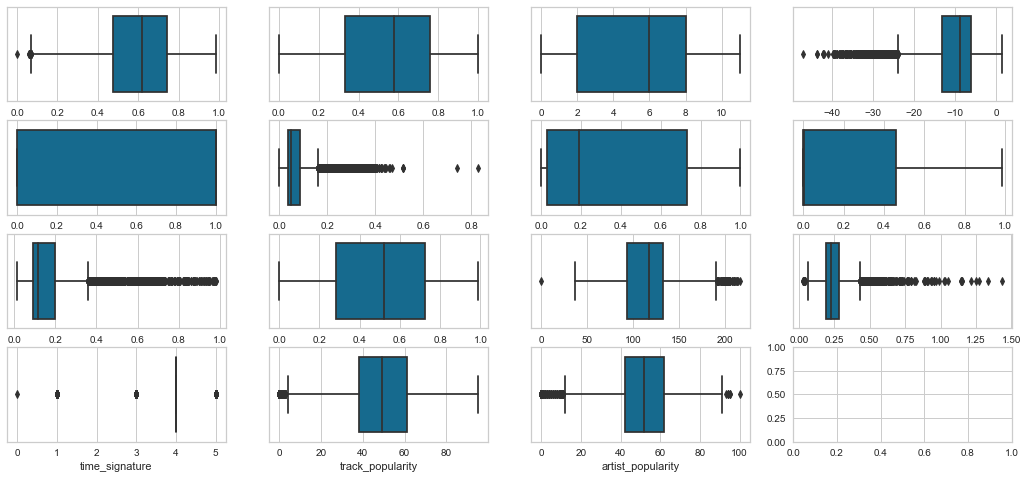

In [89]:
fig, axes = plt.subplots(4, 4, figsize=(18, 8))
 
sns.boxplot(ax=axes[0, 0], x = df['danceability'])
sns.boxplot(ax=axes[0, 1], x = df['energy'])
sns.boxplot(ax=axes[0, 2], x = df['key'])
sns.boxplot(ax=axes[0, 3], x = df['loudness'])
sns.boxplot(ax=axes[1, 0], x = df['mode'])
sns.boxplot(ax=axes[1, 1], x = df['speechiness'])
sns.boxplot(ax=axes[1, 2], x = df['acousticness'])
sns.boxplot(ax=axes[1, 3], x = df['instrumentalness'])
sns.boxplot(ax=axes[2, 0], x = df['liveness'])
sns.boxplot(ax=axes[2, 1], x = df['valence'])
sns.boxplot(ax=axes[2, 2], x = df['tempo'])
sns.boxplot(ax=axes[2, 3], x = df['duration_ms'])
sns.boxplot(ax=axes[3, 0], x = df['time_signature'])
sns.boxplot(ax=axes[3, 1], x = df['track_popularity'])
sns.boxplot(ax=axes[3, 2], x = df['artist_popularity'])

In [90]:
# We will use winsorize in order to remove outlier in our data

df['danceability'] = winsorize(df.danceability, (0.005, 0))
df['loudness'] = winsorize(df.loudness, (0.0011, 0))
df['speechiness'] = winsorize(df.speechiness, (0, 0.123))
df['tempo'] = winsorize(df.tempo, (0.0002, 0))

<AxesSubplot:>

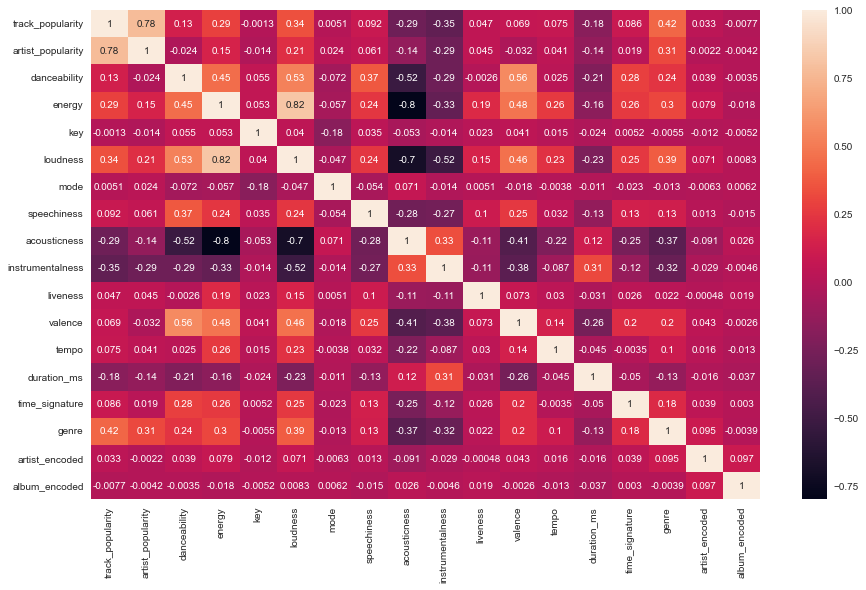

In [91]:
plt.figure(figsize =(15, 9))
sns.heatmap(df.corr(), annot=True)

In [92]:
# In order to have a equal distribution of our variables, we have applied logaritmic transformation

df['artist_popularity'] = np.log1p(df.artist_popularity)
df['track_popularity'] = np.log1p(df.track_popularity)
df['key'] = np.log1p(df.key)
df['tempo'] = np.log1p(df.tempo)
df['duration_ms'] = np.log1p(df.duration_ms)
df['time_signature'] = np.log1p(df.time_signature)
df['artist_encoded'] = np.log1p(df.artist_encoded)
df['album_encoded'] = np.log1p(df.album_encoded)

In [93]:
# Once our data has been cleaned, we will start testing different models and adjusts
# First we divide our data, we will drop some columns, like the album or the artist (encoded). 
# We have also dropped some numerical features like the time signature, the key and the mode.

X = df[['track_popularity', 'artist_popularity', 'danceability', 'energy', 'loudness', 'key', 
        'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
        'artist_encoded', 'album_encoded']]
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state=123)

In [94]:
# We have also applied a Min Max Scaler transformation over our features variable, in order to normalize our data

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [106]:
# filename = 'scaler_all'
# path = '../../models/' + filename
# with open(path, 'wb') as archivo_salida:
#     pickle.dump(scaler, archivo_salida)

In [96]:
# We have tested Random Forest Classifier model with different params, and these are the ones that gave the best results
# We have also tested our accuracy, recall and score

rf1 = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf1.fit(X_train, y_train)

rf1_pred = rf1.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, rf1_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, rf1_pred, average='macro'))
print("SCORE IN TEST: ", rf1.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf1.score(X_train, y_train))

ACCURACY OF THE MODEL:  0.7668478260869566
RECALL OF THE MODEL:  0.7599156410427284
SCORE IN TEST:  0.7668478260869566
SCORE IN TRAIN:  0.9915737972275075


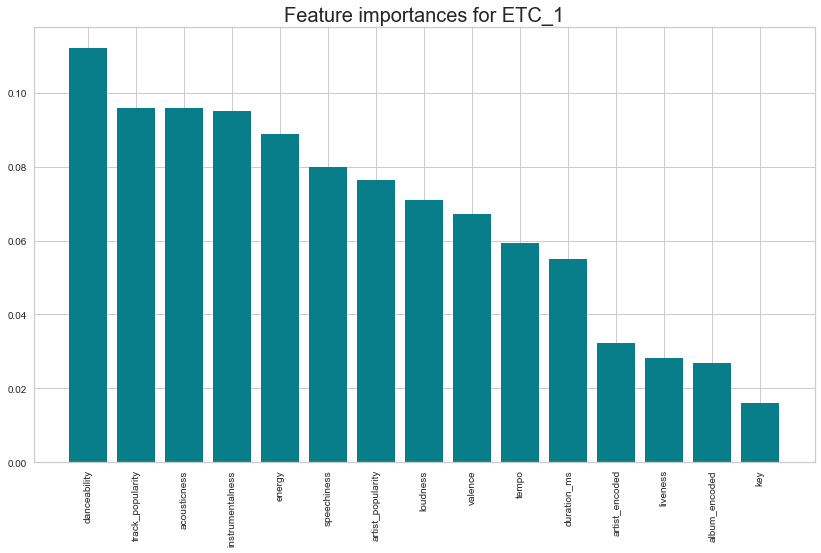

In [97]:
# In order to observe which have been the most important features, we visualize the feature importance with a plot

importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': rf1.feature_importances_})

importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (14,8))

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances for ETC_1', size=20)
plt.xticks(rotation='vertical')
plt.show()

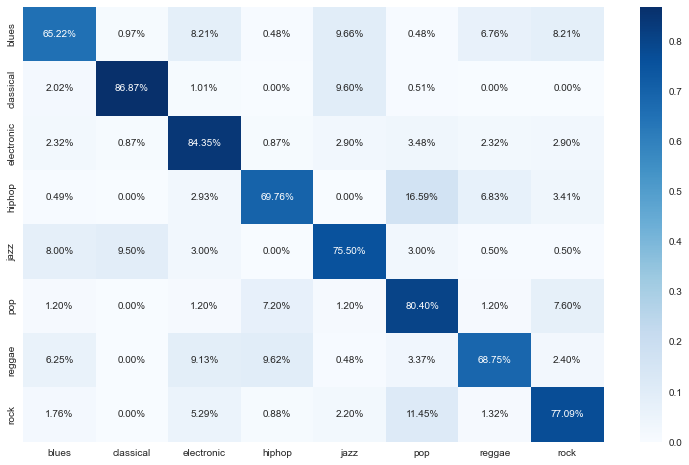

In [99]:
# From the confusion matrix we can observe that the classes which got the worst classification, have been 
# trance, techno and synthwave

x_axis_labes = ['blues', 'classical', 'electronic', 'hiphop', 'jazz', 'pop', 'reggae', 'rock']
y_axis_labels = ['blues', 'classical', 'electronic', 'hiphop', 'jazz', 'pop', 'reggae', 'rock']
plt.figure(figsize=(13,8))
sns.heatmap(confusion_matrix(y_test, rf1_pred, normalize='true', labels=np.unique(y_test)), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=x_axis_labes, yticklabels=y_axis_labels);

In [100]:
# In order to try to improve our resaults, we have tested SMOTE, a random oversampler
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

In [101]:
# After testing with the model, our accuracy has improved a lot, but it can be also due to overf2itting

rf2 = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf2.fit(X_train_smote, y_train_smote)

rf2_pred = rf2.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, rf2_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, rf2_pred, average='macro'))
print("SCORE IN TEST: ", rf2.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf2.score(X_train_smote, y_train_smote))

ACCURACY OF THE MODEL:  0.7690217391304348
RECALL OF THE MODEL:  0.7659477827664889
SCORE IN TEST:  0.7690217391304348
SCORE IN TRAIN:  0.9945652173913043


In [102]:
# We will try now undersampling, since it's a safer technique, and see if we also get good resaults.
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

In [103]:
# Undersampling has given us better resaults, as we can see in the accuracy
rf3 = RandomForestClassifier(max_depth=25, min_samples_leaf=1, min_samples_split=5, n_estimators=1200)
rf3.fit(X_train_rus, y_train_rus)

rf3_pred = rf3.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, rf3_pred))
print("RECALL OF THE MODEL: ", metrics.recall_score(y_test, rf3_pred, average='macro'))
print("SCORE IN TEST: ", rf3.score(X_test, y_test))
print("SCORE IN TRAIN: ", rf3.score(X_train_rus, y_train_rus))

ACCURACY OF THE MODEL:  0.7635869565217391
RECALL OF THE MODEL:  0.7615926911976691
SCORE IN TEST:  0.7635869565217391
SCORE IN TRAIN:  0.9906881313131313


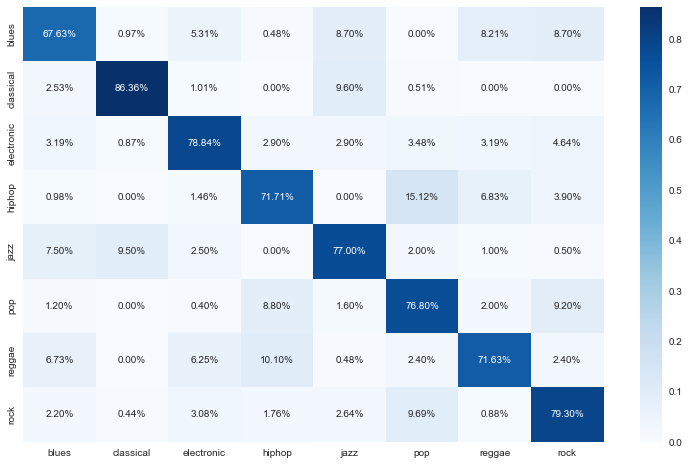

In [105]:
# From the confusion matrix we can observe that the classes which got the worst classification, have been 
# trance, techno and synthwave

x_axis_labes = ['blues', 'classical', 'electronic', 'hiphop', 'jazz', 'pop', 'reggae', 'rock']
y_axis_labels = ['blues', 'classical', 'electronic', 'hiphop', 'jazz', 'pop', 'reggae', 'rock']
plt.figure(figsize=(13,8))
sns.heatmap(confusion_matrix(y_test, rf3_pred, normalize='true', labels=np.unique(y_test)), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=x_axis_labes, yticklabels=y_axis_labels);

In [107]:
#This code will be used to save the desired data as a train and test csv files

# train_data = X_train
# train_data['genre'] = y_train
# test_data = X_test
# test_data['genre'] = y_test
# train_data.to_csv('../../data/train_all.csv', index=False)
# test_data.to_csv('../../data/test_all.csv', index=False)

In [108]:
# # # The code below will be used to save our model into the specific folder

# filename = 'my_model_all'
# # date = str(datetime.today().strftime('%y%m%d%H%M%S'))
# # name = filename + date
# path = '../../models/' + filename
# with open(path, 'wb') as archivo_salida:
#     pickle.dump(rf1, archivo_salida)

In [109]:
# We will try now to test unsupervised learning, usingg clustering in order go create groups within the tracks,
# and see if there's a clear division. For this, we will use both the train and the test data.

X_train = pd.read_csv('../../data/train_all.csv')
X_train.drop(['genre'], axis=1)

X_test = pd.read_csv('../../data/test_all.csv')

X_all = pd.concat([X_train, X_test])

X = X_all.drop(['genre'], axis=1)

In [110]:
# This will help us to visually observe how many cluster will we need

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15, 1)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

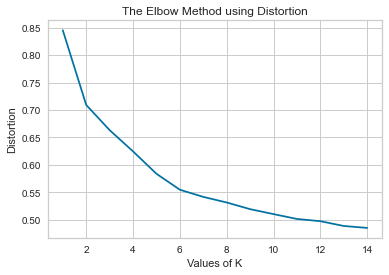

In [111]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

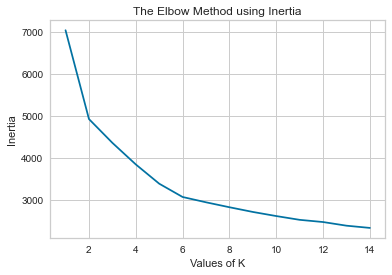

In [112]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [113]:
# From the visualization we can clearly see the cluster of 'ambient', which was already quite different in the EDA

kmeans = KMeans(init="k-means++",
                n_clusters=8,
                random_state=15,
                max_iter = 500).fit(X)

X['kmeans'] = kmeans.labels_

fig = px.scatter_3d(X, x='energy', y='instrumentalness', z='loudness',
              color='kmeans')
fig.show()

In [114]:
# We add the genre column, which is our target, so we can plot the results of our clustering
# For this we also need to decode our genres

col_list = X_all.genre.values.tolist()

X['genre'] = col_list

genre_decode_dict = {1 : 'blues',
                 2 : 'classical',
                 3 : 'country',
                 4 : 'disco',
                 5 : 'electronic',
                 6 : 'hiphop',
                 7 : 'metal',
                 8 : 'jazz',
                 9 : 'pop',
                 10: 'reggae',
                 11: 'rock',
                 12: 'latin'}

X.genre = X.genre.map(genre_decode_dict)

<AxesSubplot:xlabel='genre', ylabel='count'>

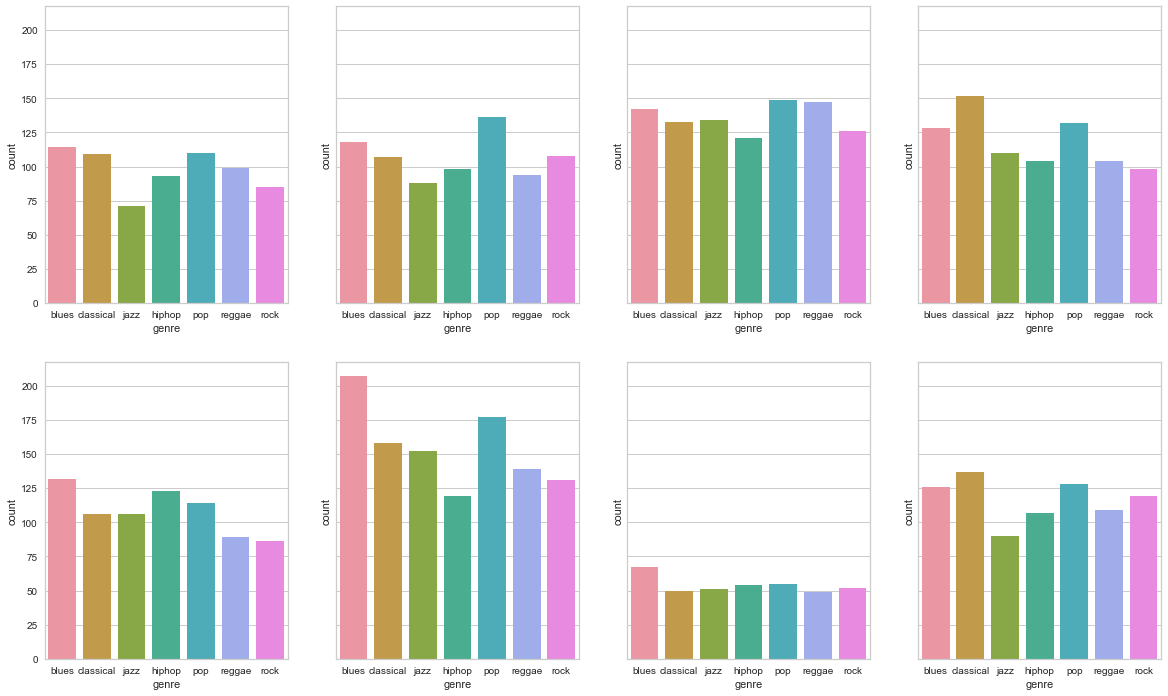

In [115]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,12), sharey=True)

df = X
mask = (df['kmeans'] == 0)
df_0 = df[mask]
sns.countplot(x=df_0["genre"], ax=axes[0,0])

df = X
mask = (df['kmeans'] == 1)
df_1 = df[mask]
sns.countplot(x=df_1["genre"], ax=axes[0,1])

df = X
mask = (df['kmeans'] == 2)
df_2 = df[mask]
sns.countplot(x=df_2["genre"], ax=axes[0,2])

df = X
mask = (df['kmeans'] == 3)
df_3 = df[mask]
sns.countplot(x=df_3["genre"], ax=axes[0,3])

df = X
mask = (df['kmeans'] == 4)
df_4 = df[mask]
sns.countplot(x=df_4["genre"], ax=axes[1,0])

df = X
mask = (df['kmeans'] == 5)
df_5 = df[mask]
sns.countplot(x=df_5["genre"], ax=axes[1,1])

df = X
mask = (df['kmeans'] == 6)
df_6 = df[mask]
sns.countplot(x=df_6["genre"], ax=axes[1,2])

df = X
mask = (df['kmeans'] == 7)
df_7 = df[mask]
sns.countplot(x=df_7["genre"], ax=axes[1,3])

After visualizing the clusters, we can see that it has mixed all the genres in the clusters.
Therefore, we won't be moving forward with this classification and will keep the Random Forest Classifier as the final model.